# Analysis 1 : 
## Average Temperatures
### Average land temperatures by Seasons and Average global temperatures by Countries

In [46]:
#do all the necessary imports
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
#inline so that we can see the plots in a single notebook
import warnings
warnings.filterwarnings('ignore')
from pandas import set_option
#set option allows you to control how pandas will display your results
#reduced the amount of results to be displayed by the following code
set_option("display.max_rows",16)
LARGE_FIGSIZE = (12,8)

In [13]:
#get the current working directory
os.getcwd()

'/Users/karandutt/Documents/SEMESTER-02/Python/final'

In [23]:
global_temp = pd.read_csv('GlobalTemperatures.csv')
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
global_temp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


## Average Land Temperatures by Seasons

In [24]:
#drop all the unnecessary columns by passing it as a list
global_temp = global_temp[['dt', 'LandAverageTemperature']]
#parse dt column to proper datetime column and then use it as year and month
global_temp['dt'] = pd.to_datetime(global_temp['dt'])
global_temp['year'] = global_temp['dt'].map(lambda x: x.year)
global_temp['month'] = global_temp['dt'].map(lambda x: x.month)
#define a method to get the season for eg month 3 to 5 is spring and so on
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)
global_temp['season'] = global_temp['month'].apply(get_season)
#create an empty list for all the seasons which will have data entered via a for loop
spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []
#loop through each of the year and append the average land temperatures according to the season
for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['LandAverageTemperature'].mean())

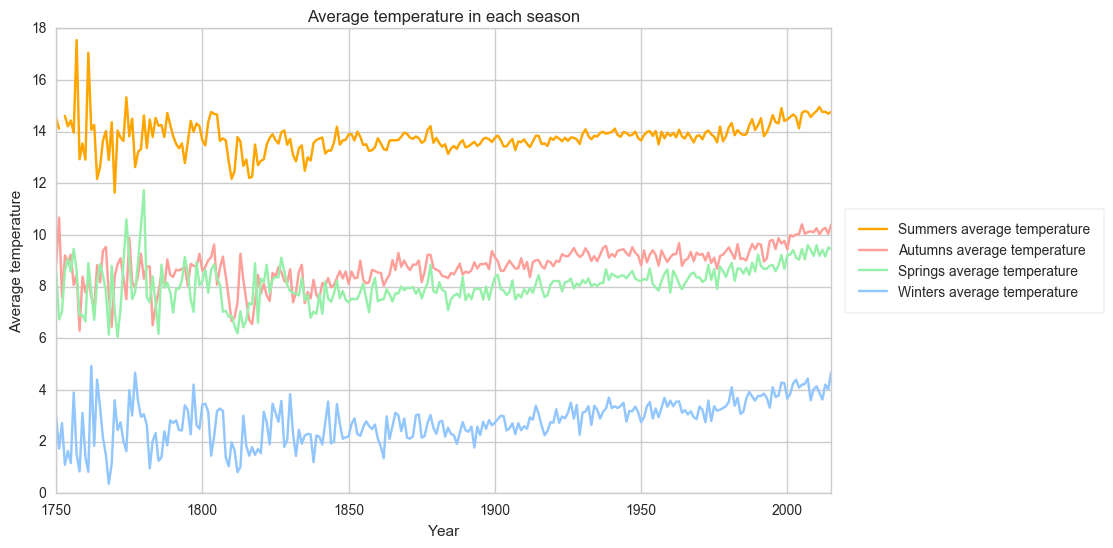

In [54]:
#use seaborn to do the plotting
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))
# use different colors to show the different seasons in the plot
plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')
#x axis should have a limit of min year and max year
plt.xlim(min_year, max_year)
ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
#set the title and create a legend to identify the colors used for each season
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)
#save the image
plt.savefig("./ana_1/avgtempbyseason.pdf", bbox_inches='tight')

## Average Global Temperatures by Countries

In [34]:
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
global_temp_country.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [35]:
global_temp_country.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,38.842000,15.003000


In [36]:
global_temp_country.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [39]:
#use numpy to get all the unique countries and remove all the duplicates from the DataFrame
countries = np.unique(global_temp_country['Country'])
#make an empty list for the mean temperature across all the countries
mean_temp = []
use the for loop and for each country append the mean to the mean_temp list
for country in countries:
    mean_temp.append(global_temp_country[global_temp_country['Country'] == 
                                               country]['AverageTemperature'].mean())

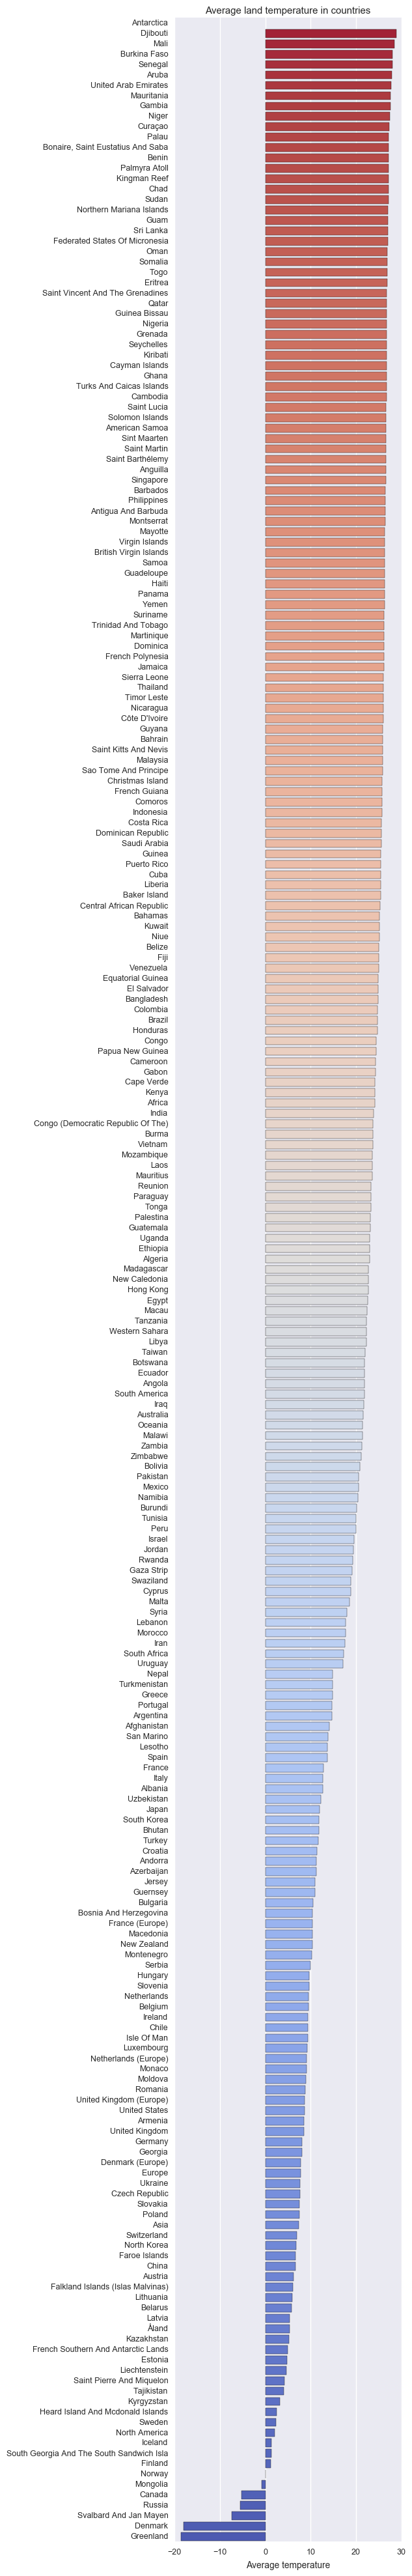

In [55]:
#do the plotting using seaborn
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')
#save the  plot as a pdf file
plt.savefig("./ana_1/avgtempbycountry.pdf", bbox_inches='tight')